## GBDT

In [1]:
%matplotlib  inline

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, auc,roc_auc_score,precision_score,accuracy_score,f1_score,recall_score,auc
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional     scklearn functions
from sklearn.grid_search import GridSearchCV 
import gc
# used_feat=pd.read_csv('feature_importance.csv',index_col=0)
# use_cols=used_feat[used_feat.imv>5].index.values
rel_df=pd.read_csv('MSN/result/train_df_std0320_20w.csv',index_col=0)


target=rel_df.is_rel
rel_df1=rel_df.ix[:,:-1]
# rel_df=rel_df1.ix[:,use_cols]
X_train, X_test, y_train, y_test = train_test_split(rel_df1, target)
# del target
# del rel_df
# gc.collect()
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)

### 1.交叉验证

In [ ]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
param = {'bst:max_depth':9, 'bst:eta':0.1, 'silent':0, 'objective':'binary:logistic' }
plst = param.items()
plst += [('eval_metric', 'auc')] # Multiple evals can be handled in this way
plst += [('eval_metric', 'error')]
num_round=100
# gbm = xgb.train(param, dtrain, num_boost_round=30, evals=watchlist, early_stopping_rounds=100, verbose_eval=True)
cvresult=xgb.cv(param, dtrain, num_round, nfold=5,
       metrics={'error'}, seed = 0,early_stopping_rounds=400,
       callbacks=[xgb.callback.print_evaluation(show_stdv=True)])

### 2.  预测分析

In [2]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
param = {'bst:max_depth':6, 'bst:eta':0.1,'silent':0, 'objective':'binary:logistic' }
plst = param.items()
plst += [('eval_metric', 'auc')] # Multiple evals can be handled in this way
plst += [('eval_metric', 'error')]
# plst += [('eval_metric', 'evalerror')]
num_round=20

# param = {'max_depth':7, 'eta':.0.1, 'silent':0, 'objective':'binary:logistic' }
bst=xgb.train(plst,dtrain,evals=watchlist,
              callbacks=[xgb.callback.print_evaluation(show_stdv=True)],num_boost_round=20)
fea_imp=pd.DataFrame(bst.get_fscore(),index=[0],columns='feature_score').T.sort_values(0,ascending=False)

[0]	train-auc:0.647968	train-error:0.393367	eval-auc:0.631545	eval-error:0.40676
[0]	train-auc:0.647968	train-error:0.393367	eval-auc:0.631545	eval-error:0.40676
[1]	train-auc:0.656458	train-error:0.38684	eval-auc:0.639143	eval-error:0.3984
[1]	train-auc:0.656458	train-error:0.38684	eval-auc:0.639143	eval-error:0.3984
[2]	train-auc:0.662474	train-error:0.383633	eval-auc:0.6443	eval-error:0.39526
[2]	train-auc:0.662474	train-error:0.383633	eval-auc:0.6443	eval-error:0.39526
[3]	train-auc:0.667379	train-error:0.37902	eval-auc:0.647926	eval-error:0.39356
[3]	train-auc:0.667379	train-error:0.37902	eval-auc:0.647926	eval-error:0.39356
[4]	train-auc:0.670925	train-error:0.37682	eval-auc:0.650316	eval-error:0.3917
[4]	train-auc:0.670925	train-error:0.37682	eval-auc:0.650316	eval-error:0.3917
[5]	train-auc:0.674736	train-error:0.373593	eval-auc:0.652718	eval-error:0.38932
[5]	train-auc:0.674736	train-error:0.373593	eval-auc:0.652718	eval-error:0.38932
[6]	train-auc:0.67768	train-error:0.372647

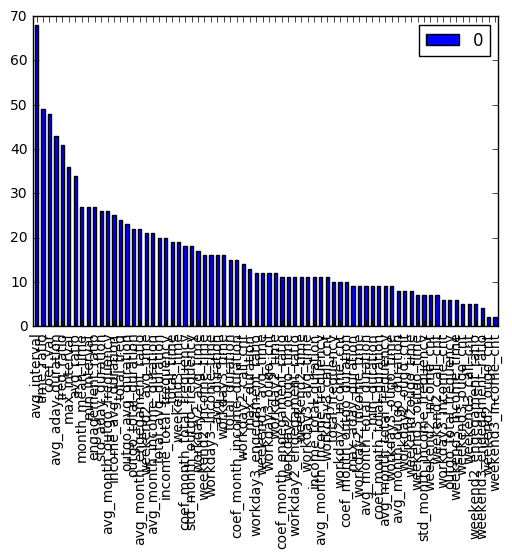

In [8]:
fea_imp.plot.bar()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# lr.fit(X_train.values, y_train.values)
reg = LogisticRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

In [5]:
X_train.values

array([[ 0.81846847,  0.65137805,  0.40325043, ...,  0.43587387,
         0.6674489 ,  0.32074023],
       [ 0.14299468,  0.41737679,  0.58972897, ...,  0.31671867,
         0.36889193,  0.49144058],
       [ 0.9597049 ,  0.89310239,  0.6214633 , ...,  0.50460124,
         0.50171982,  0.55783226],
       ..., 
       [ 0.50354138,  0.87946026,  0.93995512, ...,  0.2806858 ,
         0.21392935,  0.64173012],
       [ 0.05435459,  0.2521523 ,  0.43481341, ...,  0.05567446,
         0.20046913,  0.22592315],
       [ 0.        ,  0.5912645 ,  0.92737758, ...,  0.35884768,
         0.22194747,  0.72599312]])